# Question 2

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt # for plots
from scipy.stats import norm # for standard normal cdf
from scipy.optimize import fmin # fminsearch equivalent in Python

In [2]:
# QUESTION 2
print('QUESTION 2')

QUESTION 2


In [3]:
# PART A
print('PART A')

PART A


In [4]:
def psychometric_function(I, mu, sigma):
    """
    Implementation of the psychometric function.
    Args:
        I: Intensity value
        mu: Mean of the normal distribution used
        sigma: Standard deviation of the normal distribution used.
    Returns:
        p: The resulting probability value
    """
    return 0.5 + norm.cdf(I, loc=mu, scale=sigma) / 2

In [5]:
I = np.arange(1, 11)
probs1 = psychometric_function(I, 6, 3)
probs2 = psychometric_function(I, 3, 4)

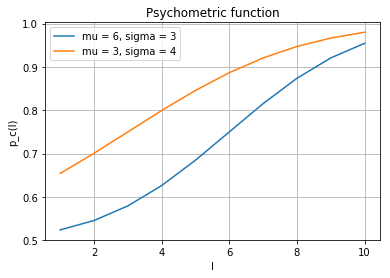

In [6]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.plot(I, probs1)
plt.plot(I, probs2)
plt.title('Psychometric function')
plt.xlabel('I')
plt.ylabel('p_c(I)')
plt.legend(['mu = 6, sigma = 3', 'mu = 3, sigma = 4'])
plt.grid()
plt.show(block=False)

In [7]:
# PART B 
print('PART B')

PART B


In [8]:
def beurnoulli(p):
    """
    Performs a beurnoulli trial with success probability p.
    Args:
        p: The success probability
    Returns:
        outcome: The outcome of the experiment 
            (1 means success, 0 means failure)
    """
    rand_val = np.random.rand()
    if rand_val <= p:
        return 1
    return 0

In [9]:
def binomial(n, p):
    """
    Performs a binomial experiment that involves n independent
    trial where the success probability of each trial is p.
    Args:
        n: The number of trials
        p: The success probability of each trial
    Returns:
        success_count: Number of successes
        trials: An array containing the trial results
    """
    trials = [beurnoulli(p) for _ in range(n)]
    return np.count_nonzero(trials), np.array(trials)

In [10]:
def simpsych(mu, sigma, I, T):
    """
    Simulates random draws using psychometric probabilities. Each draw itself
    is a binomial experiment.
    Args:
        mu: Normal distribution mean that will be given to psychometric function
        sigma: Normal distribution standard deviation that will be given to 
            psychometric function
        I: An array containing intensity values
        T: An array containing values for number of trials
    Returns:
        C: An array containing the number of trials correct out of T at each
            stimulus intensity I
        E: A matrix containing the trial result at each stimulus intensity and 
            each of T trials at that intensity
    """
    size = np.size(T)
    C = np.zeros(size)
    E = np.zeros((size, int(np.max(T))))
    for i in range(size):
        C[i], E[i] = binomial(int(T[i]), psychometric_function(I[i], mu, sigma))
    return C, E

In [11]:
mu = 5
sigma = 1.5
I = np.arange(1, 8)
T = np.ones(7) * 100

In [12]:
np.random.seed(981706)
C, E = simpsych(mu, sigma, I, T)

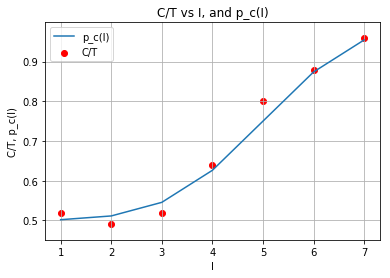

In [13]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(I, C / T, c='r')
probs = psychometric_function(I, mu, sigma)
plt.plot(I, probs)
plt.title('C/T vs I, and p_c(I)')
plt.xlabel('I')
plt.ylabel('C/T, p_c(I)')
plt.legend(['p_c(I)', 'C/T'])
plt.grid()
plt.show(block=False)

In [14]:
# PART C
print('PART C')

PART C


In [15]:
def nloglik(pp, I, T, C):
    """
    Computes and return the negative log-likelihood that we observe
    a certain data.
    Args:
        pp: A size 2 array that contains the mean and the standard
            deviation of the normal distribution that will be given to
            the psychometric function
        I: An array containing intensity values
        T: An array containing values for number of trials
        C: An array containing the number of trials correct out of T at each
            stimulus intensity I
    Returns:
        nll: The negative log-likelihood that we observe the argument data
    """
    mu = pp[0]
    sigma = pp[1]
    size = np.size(T)
    ll = 0
    for i in range(size):
        p_i = psychometric_function(I[i], mu, sigma)
        ll += C[i] * np.log(p_i) + (T[i] - C[i]) * np.log(1 - p_i)
    return -ll

In [16]:
mu_est = np.arange(2, 8.1, 0.1)
sigma_est = np.arange(0.5, 4.6, 0.1)
X, Y = np.meshgrid(mu_est, sigma_est)

In [17]:
size_mu = np.size(mu_est)
size_sigma = np.size(sigma_est)
Z = np.zeros((size_sigma, size_mu))
for i in range(size_sigma):
    for j in range(size_mu):
            Z[i, j] = nloglik([mu_est[j], sigma_est[i]], I, T, C)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


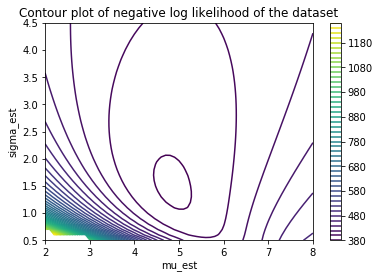

In [18]:
plt.figure(figure_num)
figure_num += 1
plt.contour(X, Y, Z, 50)
plt.title('Contour plot of negative log likelihood of the dataset')
plt.xlabel('mu_est')
plt.ylabel('sigma_est')
plt.colorbar()
plt.show(block=False)

In [19]:
# PART D
print('PART D')

PART D


In [20]:
mu_best, sigma_best = fmin(func=lambda pp: nloglik(pp, I, T, C), x0=[2, 2])
print('Best mu_est:', mu_best)
print('Best sigma_est:', sigma_best)

Optimization terminated successfully.
         Current function value: 377.354195
         Iterations: 44
         Function evaluations: 85
Best mu_est: 4.8630993962982325
Best sigma_est: 1.471239681344411


In [21]:
# PART E
print('PART E')

PART E


In [22]:
def resample_matrix(matrix):
    """
    Resamples a matrix using bootstrapping on each row.
    Args:
        matrix: The matrix that will be resampled
    Returns:
        resample_matrix: The resampled matrix
    """
    num_rows, num_cols = np.shape(matrix)
    resampled_matrix = np.zeros((num_rows, num_cols))
    indices = np.arange(num_cols)
    for i in range(num_rows):
        bootstrap_indices = np.random.choice(indices, num_cols)
        resampled_matrix[i] = matrix[i][bootstrap_indices]
    return resampled_matrix

In [23]:
NUM_RESAMPLES = 200

In [24]:
mu_resamples = []
sigma_resamples  = []
np.random.seed(7) # to be able to reproduce results
for i in range(NUM_RESAMPLES):
    E_resample = resample_matrix(E)
    C_resample = np.sum(E_resample, axis=1)
    mu_resample, sigma_resample = fmin(
        func=lambda pp: nloglik(pp, I, T, C_resample), x0=[2, 2], disp=False)
    mu_resamples.append(mu_resample)
    sigma_resamples.append(sigma_resample)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


In [25]:
def compute_confidence_interval(data, confidence):
    """
    Given the data and the confidence level, computes the confidence interval
    of the data samples.
    Args:
        data: The given data
        confidence: The confidence level, known as alpha (between 0 and 100)
    Returns:
        lower: The lowerbound of the confidence interval
        upper: The upperbound of the confidence interval
    """
    sorted_data = np.sort(data)
    lower = np.percentile(sorted_data, (100 - confidence) / 2)
    upper = np.percentile(sorted_data, confidence + (100 - confidence) / 2)
    return lower, upper

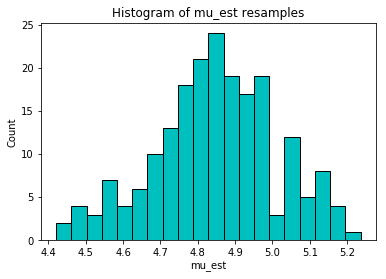

In [26]:
plt.figure(figure_num)
figure_num += 1
plt.hist(mu_resamples, bins=20, color='c', edgecolor='k')
plt.title('Histogram of mu_est resamples')
plt.xlabel('mu_est')
plt.ylabel('Count')
plt.show(block=False)

In [27]:
mu_lower, mu_upper = compute_confidence_interval(mu_resamples, 95)
print('95%% Confidence interval for mu_est: (%1.5f, %1.5f)' % (mu_lower, mu_upper))

95% Confidence interval for mu_est: (4.49845, 5.15409)


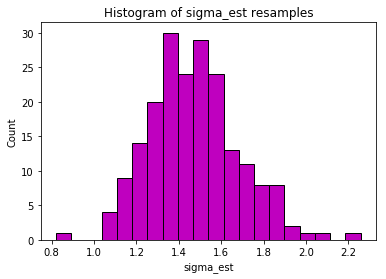

In [28]:
plt.figure(figure_num)
figure_num += 1
plt.hist(sigma_resamples, bins=20, color='m', edgecolor='k')
plt.title('Histogram of sigma_est resamples')
plt.xlabel('sigma_est')
plt.ylabel('Count')
plt.show(block=False)

In [29]:
sigma_lower, sigma_upper = compute_confidence_interval(sigma_resamples, 95)
print('95%% Confidence interval for sigma_est: (%1.5f, %1.5f)' % (sigma_lower, sigma_upper))

95% Confidence interval for sigma_est: (1.12135, 1.88954)


In [30]:
plt.show()